In [2]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution as de

In [3]:
# open measurement file
scan_file = pd.read_csv('./measurement/R_5_B6.csv')
scan = scan_file['SCAN'].values

In [4]:
# open material
SiO2 = ml.open_material('SiO2', 'Sellmeier')
SiN = ml.open_material('SiN', 'Sellmeier')
ITO = ml.open_material('ITO', 'Sellmeier')
Acrylic = ml.open_material('Acrylic', 'Sellmeier')
OC = ml.open_material('OC', 'Sellmeier')
sodalime = ml.open_material('sodalime', 'Material')
SiO2.k = 1e-3
ITO.k = 1e-1
SiN.k = 1e-1
air = ml.Non_Dispersion(1)

In [5]:
SiO2_t = ml.Non_Dispersion(1.48)
SiN_t = ml.Non_Dispersion(2.1)
ITO_t = ml.Non_Dispersion(1.9)

In [36]:
x = 250
target_w = np.linspace(400, 700, 301)[x:x+50]
target_R = (scan[x:x+50] - 0.11)/100
print(target_R)

[0.0471 0.0485 0.0494 0.0505 0.0514 0.0524 0.0532 0.0539 0.0544 0.0551
 0.0555 0.056  0.0563 0.0567 0.0569 0.057  0.0571 0.057  0.057  0.0567
 0.0563 0.0559 0.0554 0.0548 0.0542 0.0535 0.0528 0.0519 0.051  0.0501
 0.0489 0.0479 0.0469 0.046  0.0449 0.0439 0.0428 0.0416 0.0404 0.0393
 0.0379 0.0369 0.0359 0.0348 0.034  0.033  0.032  0.0312 0.0303 0.0297]


In [37]:
def fom(th):
    SiO2_t.n = th[6]
    SiO2_t.k = th[7] 
    SiN_t.n = th[8] 
    SiN_t.k = th[9] 
    ITO_t.n = th[10] 
    ITO_t.k = th[11]
    hypo_R = tm.Design([air, Acrylic, SiN_t, SiO2_t, ITO_t, SiO2_t, SiN_t, sodalime],
                       [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
                      ).reflectance(target_w, 5)
    return sum((target_R - hypo_R)**2)

In [38]:
tht = [(1600,2100),(8,12),(40,60),(20,26),(40,60),(8,12),
       (1.4,1.52),(0,1e-3),(1.9, 3.4),(1e-3,1),(1.7,1.9),(1e-3,1)]
sol = de(fom, tht)

In [39]:
print(sol.message)
print(sol.x)

Maximum number of iterations has been exceeded.
[1.98811782e+03 8.35106141e+00 4.62921858e+01 2.28321024e+01
 5.02515720e+01 9.52627516e+00 1.48240945e+00 6.75672718e-04
 2.14256900e+00 9.22651423e-01 1.80030850e+00 2.90965791e-01]


In [12]:
def hyp(th):
    SiO2_t.n = th[6]
    SiO2_t.k = th[7] 
    SiN_t.n = th[8] 
    SiN_t.k = th[9] 
    ITO_t.n = th[10] 
    ITO_t.k = th[11]
    hypo_R = tm.Design([air, Acrylic, SiN_t, SiO2_t, ITO_t, SiO2_t, SiN_t, sodalime],
                       [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
                      ).reflectance(target_w, 5)
    return hypo_R

In [13]:
hypo_R = lambda th: tm.Design([air, Acrylic, SiN, SiO2, ITO, SiO2, SiN, sodalime],
                              [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
                             ).reflectance(target_w, 5)
FOM = lambda th: sum((hypo_R(th)-target_R)**2)

In [14]:
th = [(1500, 2500),(4, 20),(20, 80),(10,30),(20, 80),(4,20)]
res = de(FOM, th)

In [15]:
print(res.message)
print(res.x)

Optimization terminated successfully.
[1761.61872795   17.5172188    26.65292249   29.99451415   22.47133706
   12.82781435]


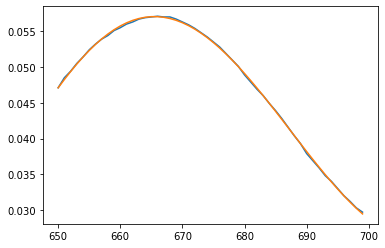

In [40]:
plt.plot(target_w, target_R)
#plt.plot(target_w, hypo_R(res.x))
plt.plot(target_w, hyp(sol.x))
#plt.savefig('highn.png')
plt.show()